In [25]:
from utils import *

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [26]:
# Input data

# Amount of numbers 
center = 10
std = 1
n = 10

# numbers = np.random.normal(center, std, n)

gaussian = np.random.normal(center, std, n)
extra_noise = np.random.randint(-100,100,2)
# extra_noise = np.array([[100, 105]])
numbers = np.concatenate((gaussian, extra_noise))
n = numbers.shape[0]

In [27]:
# GNC initiation
# Initial value
x0 = 1.0

# Loss function initiation
r = np.zeros(n)
for i in range(n):
    r[i] = np.linalg.norm(numbers[i] - x0)
r0_max = np.max(r)

max_iterations = 1000
eps = 0.2
mu_update = 1.4
w = np.ones(n)
mu = eps**2 / (2*r0_max**2 - eps**2)
print(mu)

2.834475154408035e-06


In [28]:
# GNC iteration
last_iter = []
x_iter = []
iterations = 0
for i in range(max_iterations):
    iterations += 1
    last_iter.append(np.sum(w))
    # Weighted average
    x = np.dot(numbers,w)/np.sum(w)
    x_iter.append(x)

    # Loss function
    for j in range(n):
        r[j] = np.linalg.norm(numbers[j] - x)
        w[j] = w_from_r(r[j], eps, mu)
    print(r)
    mu = mu_update * mu
    
    if i >= 5:
        if np.sum(w) == last_iter[i]:
            break

print("Ended after", iterations, "iterations\n")

[ 7.00  8.11  6.45  4.90  7.55  7.91  7.54  6.97  5.17  7.61  68.61  0.61]
[ 4.37  5.49  3.82  2.27  4.92  5.28  4.92  4.34  2.55  4.98  71.23  3.23]
[ 1.34  2.45  0.78  0.77  1.88  2.24  1.88  1.30  0.49  1.95  74.27  6.27]
[ 0.78  1.89  0.22  1.33  1.33  1.69  1.32  0.74  1.05  1.39  74.83  6.83]
[ 0.37  1.48  0.19  1.74  0.91  1.27  0.91  0.33  1.46  0.98  75.24  7.24]
[ 0.18  1.30  0.37  1.92  0.73  1.09  0.73  0.15  1.64  0.79  75.42  7.42]
[ 0.04  1.15  0.51  2.07  0.59  0.95  0.58  0.01  1.79  0.65  75.57  7.57]
[ 0.03  1.14  0.53  2.08  0.57  0.93  0.57  0.01  1.80  0.64  75.58  7.58]
[ 0.02  1.13  0.54  2.09  0.57  0.93  0.56  0.02  1.81  0.63  75.59  7.59]
[ 0.01  1.12  0.55  2.10  0.56  0.92  0.55  0.03  1.82  0.62  75.60  7.60]
[ 0.00  1.11  0.55  2.11  0.55  0.91  0.54  0.03  1.83  0.61  75.61  7.61]
[ 0.00  1.11  0.55  2.11  0.55  0.91  0.54  0.03  1.83  0.61  75.61  7.61]
[ 0.00  1.11  0.55  2.11  0.55  0.91  0.54  0.04  1.83  0.61  75.61  7.61]
[ 0.00  1.11  0.55  2.11 

In [29]:
inliers = []
outliers = []

for i, n in enumerate(numbers):
    if w[i] == 1.0:
        inliers.append(n)
    else:
        outliers.append(n)

percentage = (1-len(inliers)/(len(outliers)+len(inliers)))*100

print("Inliers:\t", len(inliers), "\nOutliers:\t", len(outliers),\
    "\nPercentage:\t",percentage, "%")

Inliers:	 2 
Outliers:	 10 
Percentage:	 83.33333333333334 %


In [30]:
print("\n x = \n {}".format(x))
print("\n r = \n {}".format(r))
print("\n w = \n {}".format(w))
print(mu)


 x = 
 9.408313572203737

 r = 
 [ 0.02  1.13  0.54  2.09  0.56  0.93  0.56  0.02  1.81  0.63  75.59  7.59]

 w = 
 [ 1.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00]
0.368938436763033


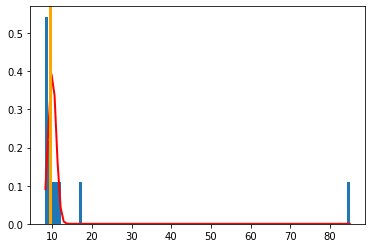

In [31]:
count, bins, ignored = plt.hist(numbers, 100, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - center)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.axvline(x, linewidth=3 ,color='orange')
plt.show()

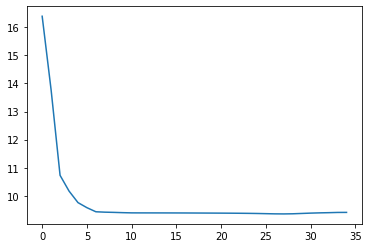

In [32]:
plt.plot(x_iter)